# Ejercicio 5.2. 

In [1]:
#Librerías
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Parámetros  

#Parámetros(20 grados celsius)

c0=344 #Velocidad del sonido
rho=1.18 #Densidad
Z0=rho*c0 #Impedancia caraterística
n= 18.13*10**(-6) #Pa *s

#Datos ejercicio

resistividad=30000 #resistividad, mover al final, más resistividad, más rango
dp=0.075 #espesor del material poroso 
da=0.035 #espesor cavidad de aire
lc=dp+da 
q=dp/lc
lh=0.0025  #espesor placa
rh=0.0015 #radio perforaciones
phi=0.08    #porosidad #si cambio porosidad cambiarlo en fucion de rh

b=np.sqrt((np.pi*rh**2)/phi)

In [3]:
#frecuencias
#frecuencia=[100. ,125. ,160., 200. , 250. ,	315. ,400.,	500. ,630.,	800.,1000.,1250.,1600.,	2000.,	2500.,	3150.,	4000. ]
frec=  np.linspace(257,4000,100)


In [4]:
# Paso1: Calcular X:

#X=rho0*f/resistividad al flujo

#Para armar arreglo 
arrayf=[]
arrayX=[]

for i in (frec):
    x=rho*i/resistividad
    if 0.01 < x < 1:      #condición del modelo 
        arrayf.append(i) #frecuencias que cumplen condición 
        arrayX.append(x)
       
arrayf=np.array(arrayf) #formato numpy array
arrayX=np.array(arrayX)
arrayw=2*np.pi*arrayf

#print (arrayX) #bien
#print (arrayf) #bien
#print (arrayw) #bien

In [5]:
#Paso2: Calcular Zc
    
#Zc=(1+a1*X**a2+ja3*X**a4)*Z0 #saqué los valores de los "a" de la tabla
#Z0=rho*c0

#Parámetros del modelo
a1=0.0571
a2=(-0.754)
a3=(-0.087 )
a4=(-0.732)

#Para armar arreglo
arrayZc=[]


for i in (arrayX):
        Zc=Z0*(1+a1*(i**a2)+(1.j*a3*(i**a4)))
        arrayZc.append(Zc)

arrayZc=np.array(arrayZc) #bien
#print(arrayZc)

In [6]:
#Paso2: Calcular kc
    
#kc=(1+b1*X**b2+jb3*X**b4)*k0 #saqué los valores de los "b" de una tabla
#k0=2*pi*f/C0

#Parámetros del modelo
b1=0.0978
b2=-0.7 
b3=-0.189
b4=-0.595

#Para armar arreglo
arraykc=[]
arrayk0=[]


for i in range (len(arrayf)):
    k0=2*np.pi*arrayf[i]/c0
    arrayk0.append(k0)
    
for j in range (len(arrayX)):
    kc=arrayk0[j]*(1+b1*(arrayX[j]**b2)+(1.j*b3*(arrayX[j]**b4)))          
    arraykc.append(kc)

arrayk0=np.array(arrayk0) #bien
arraykc=np.array(arraykc) #bien 
#print(arrayk0)
#print(arraykc)

In [7]:
#Paso3: calcular Zwm

#Zwm=-jZc*cot(kc*lc*q)

arrayZwm=-1.j*arrayZc*(np.tan(arraykc*lc*q))**(-1) #ese resultado no se si está bien, 
                                              #puedo colocar un complejo en cot?

arrayZwm=np.array(arrayZwm)
#print(arrayZwm)
#print(len(arrayZwm))

In [8]:
#Paso4: Zwe

#Zwe=-jZ0*cot(k0*lc(1-q))

arrayZwe=-1.j*Z0*(1/np.tan((arrayk0*lc*(1-q)))) #bien

arrayZwe=np.array(arrayZwe)
#print(arrayZwe)
#print(len(arrayZwe)) 

In [9]:
#Paso5: Zwem

#Zwem=(Zwm*Zwe+Z0**2)/Zwm+Zwe

arrayZwem=((arrayZwm*arrayZwe)+(Z0**2))/(arrayZwm+arrayZwe)

arrayZwem=np.array(arrayZwem)   
#print(arrayZwem)

In [10]:
#Paso6: Zw

#Zw=Ra+jwma+Zwem

#x=rh*(raiz(rho*w/n))
x=np.sqrt((rho*arrayw)/n)*rh

#Ra=(8*n)/(phi*rh**2)*(raiz(1+(x**2/32))+raiz(1/8)*(rh/lh)*x)*lh
ra1=np.sqrt(1+((x**2)/32))
ra2=np.sqrt(1/8)*x*(rh/lh)

Ra=(8*n*lh)/(phi*(rh**2))*(ra1+ra2)

#jma=(lh/phi)*(1+(1/raiz(9+(x**2/2)))+1.7*(rh/lh))*rho
ma1=(1/(np.sqrt(9+((x**2)/2))))
ma2=1.7*(rh/lh)

ma=((lh*rho)/phi)*(1+ma1+ma2)
arrayjwma=1.j*arrayw*ma

#Calculando Zw

arrayZw=Ra+arrayjwma+arrayZwem

arrayZw=np.array(arrayZw)

for i in range(len(arrayf)):
    print('La parte real de la impedancia para',round(arrayf[i],0),'Hz es de:',np.real(arrayZw[i])/Z0,'y la imaginaria:',np.imag(arrayZw[i])/Z0)

#print(arrayZw)

La parte real de la impedancia para 257.0 Hz es de: 0.9914895992954749 y la imaginaria: -1.5291744765895494
La parte real de la impedancia para 295.0 Hz es de: 0.9849997490714785 y la imaginaria: -1.267291084684836
La parte real de la impedancia para 333.0 Hz es de: 0.976243680472506 y la imaginaria: -1.058825920070573
La parte real de la impedancia para 370.0 Hz es de: 0.9655734992075674 y la imaginaria: -0.8869759551246862
La parte real de la impedancia para 408.0 Hz es de: 0.9531500911742582 y la imaginaria: -0.7410966552097638
La parte real de la impedancia para 446.0 Hz es de: 0.9390839446303026 y la imaginaria: -0.6140747639661763
La parte real de la impedancia para 484.0 Hz es de: 0.923496806886257 y la imaginaria: -0.5009506727057863
La parte real de la impedancia para 522.0 Hz es de: 0.9065461629906607 y la imaginaria: -0.39815107076970324
La parte real de la impedancia para 559.0 Hz es de: 0.8884305034786454 y la imaginaria: -0.3030393716286461
La parte real de la impedancia 

Text(0.5, 1.0, 'Zw parte real')

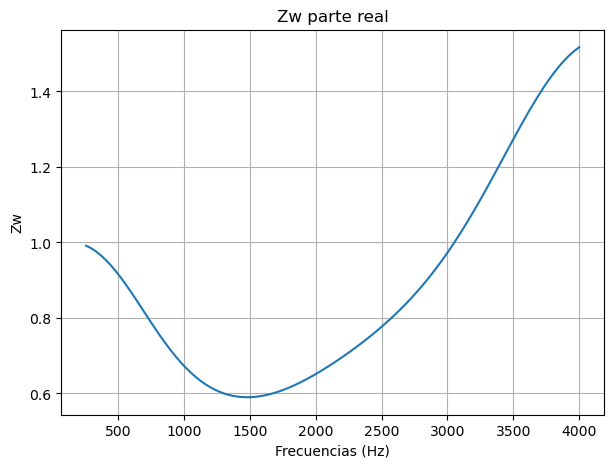

In [19]:
fig, ax = plt.subplots(1,1,figsize=(7,5))
ax.plot(arrayf,np.real(arrayZw)/Z0)
ax.set_xlabel('Frecuencias (Hz)')
ax.set_ylabel('Zw')
ax.grid() #grilla
ax.set_title('Zw parte real')

Text(0.5, 1.0, 'Zw parte imaginaria')

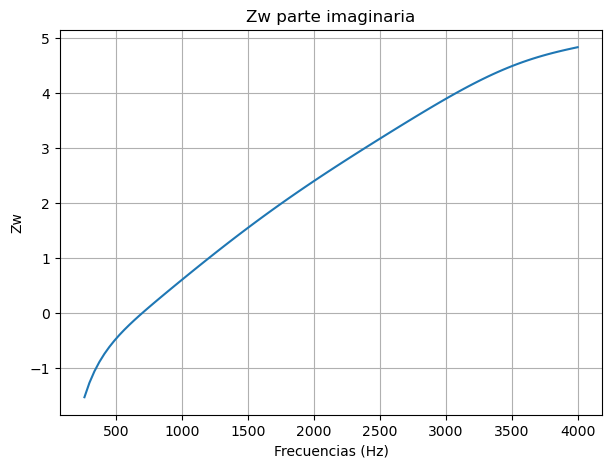

In [20]:
fig, ax = plt.subplots(1,1,figsize=(7,5))
ax.plot(arrayf,np.imag(arrayZw)/Z0)
ax.set_xlabel('Frecuencias (Hz)')
ax.set_ylabel('Zw')
ax.grid() #grilla
ax.set_title('Zw parte imaginaria')

# Calculando coeficiente de reflexion 

In [14]:
#Paso1: Calcular R(w)

#R(w)=(Zw-Z0)/(Zw+Z0)
Rw=(arrayZw-Z0)/(arrayZw+Z0)

print(Rw)

[ 0.36822286-0.48511299j  0.28420122-0.45699019j  0.21369376-0.4212848j
  0.15462941-0.38147817j  0.10488481-0.33963948j  0.06259562-0.29685996j
  0.02627269-0.25359509j -0.00517993-0.20991543j -0.0324927 -0.1656857j
 -0.05607789-0.12069239j -0.07608546-0.07473519j -0.092463  -0.02769219j
 -0.10501841+0.02043617j -0.11348385+0.06950207j -0.11757876+0.11920388j
 -0.1170683 +0.16909763j -0.1118126 +0.21862501j -0.10180249+0.26715432j
 -0.08717814+0.3140291j  -0.06822971+0.35861811j -0.04538125+0.40036014j
 -0.01916187+0.43879864j  0.00983082+0.47360302j  0.04096918+0.50457619j
  0.07363124+0.53164969j  0.10723009+0.55486947j  0.14123538+0.57437592j
  0.17518648+0.59038129j  0.20869831+0.60314746j  0.24146118+0.6129658j
  0.27323639+0.62014024j  0.30384909+0.624974j    0.33317982+0.62775974j
  0.36115559+0.62877282j  0.38774139+0.62826725j  0.41293229+0.62647352j
  0.43674662+0.623598j    0.45922009+0.61982347j  0.48040091+0.61531021j
  0.50034587+0.61019763j  0.51911716+0.60460603j  0.53

C:\Users\Ariadnampg\miniconda3\envs\acus125\lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\Ariadnampg\miniconda3\envs\acus125\lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 1.0, 'R(w)')

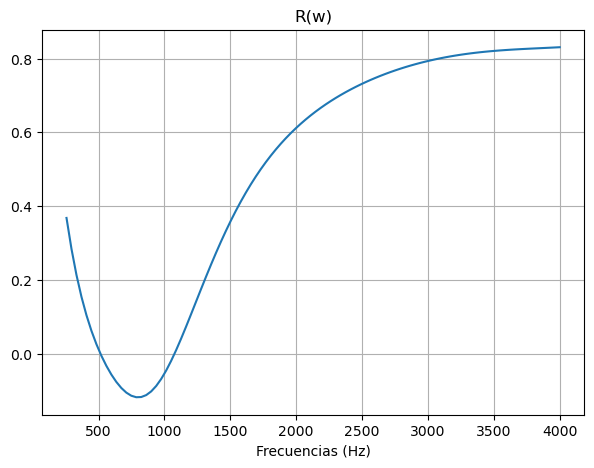

In [15]:
fig, ax = plt.subplots(1,1,figsize=(7,5))
ax.plot(arrayf,Rw)
ax.set_xlabel('Frecuencias (Hz)')
ax.grid() #grilla
ax.set_title('R(w)')

# Calculando coeficiente de absorción

In [16]:
#Paso1: Calcular a(w)

#a(w)=1-abs(R(w))**2

aw=1-(np.abs(Rw))**2

for i in range(len(arrayf)):
    print('El coef. de abs. para',round(arrayf[i],0),'Hz es de:',aw[i])
    
#print(aw)

El coef. de abs. para 257.0 Hz es de: 0.6290773107157599
El coef. de abs. para 295.0 Hz es de: 0.7103896328236342
El coef. de abs. para 333.0 Hz es de: 0.7768540924299306
El coef. de abs. para 370.0 Hz es de: 0.830564149355959
El coef. de abs. para 408.0 Hz es de: 0.8736442029186882
El coef. de abs. para 446.0 Hz es de: 0.9079559549194558
El coef. de abs. para 484.0 Hz es de: 0.9349992748863469
El coef. de abs. para 522.0 Hz es de: 0.9559086785302001
El coef. de abs. para 559.0 Hz es de: 0.9714924717289769
El coef. de abs. para 597.0 Hz es de: 0.9822886179125442
El coef. de abs. para 635.0 Hz es de: 0.9886256543298859
El coef. de abs. para 673.0 Hz es de: 0.990683736604673
El coef. de abs. para 711.0 Hz es de: 0.9885534974783197
El coef. de abs. para 749.0 Hz es de: 0.9822908782759152
El coef. de abs. para 786.0 Hz es de: 0.9719656697399012
El coef. de abs. para 824.0 Hz es de: 0.9577010066243177
El coef. de abs. para 862.0 Hz es de: 0.9397010482550022
El coef. de abs. para 900.0 Hz es

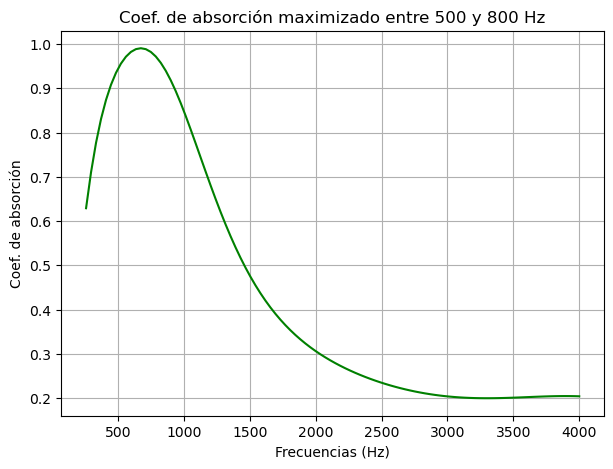

In [17]:
fig, ax = plt.subplots(1,1,figsize=(7,5))
ax.plot(arrayf,aw, color='green')
ax.set_xlabel('Frecuencias (Hz)')
ax.set_ylabel('Coef. de absorción')
ax.grid() #grilla
ax.set_title('Coef. de absorción maximizado entre 500 y 800 Hz')
plt.savefig('Amax(200-4000).png')